In [1]:
!pip install sentence_transformers

     ---------------------------------------- 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 8.3/8.3 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 977.6/977.6 kB 5.1 MB/s eta 0:00:00
     -------------------------------------- 311.7/311.7 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 169.0/169.0 kB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 277.8/277.8 kB 4.3 MB/s eta 0:00:00
     -------------------------------------- 192.2/192.2 MB 2.3 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=eb31a102bf04317bf61412c94741f63608e01484fe0da5e51e25d9d89a48d45c
  S

In [1]:
import pandas as pd
%load_ext autoreload
import numpy as np

In [2]:
news_df = pd.read_csv('./data/war-news.csv', engine='python')

In [3]:
news_df

,Unnamed: 0,Headlines,Summary,Press,Date,Keyword
0,0,I served in Iraq and Afghanistan but the horro...,A WAR hero traumatised by the horrors of comba...,The Sun,1 day ago,Afghanistan
1,1,The forever war in Afghanistan is nowhere near...,Islamic State is seeking to overthrow the Tali...,ThePrint,2 weeks ago,Afghanistan
2,2,"Hell at Abbey Gate: Chaos, Confusion and Death...","In firsthand accounts, Afghan civilians and U....",ProPublica,1 month ago,Afghanistan
3,3,‘A second Afghanistan’: Doubts over Russia’s w...,Russia's lack of progress in its war against U...,Al Jazeera,5 days ago,Afghanistan
4,4,Afghanistan: Former army general vows new war ...,Lt Gen Sami Sadat tells the BBC of planned ope...,BBC,1 week ago,Afghanistan
...,...,...,...,...,...,...
5649,216,"We first cut rations in half. Now, we'll take ...","We first cut rations in half. Now, we'll take ...",USA Today,1 month ago,Yemen
5650,217,Yemen war: Two foreign Doctors Without Borders...,The conflict began in 2014 after Houthi rebels...,Middle East Eye,6 Mar 2022,Yemen
5651,218,"Devastated by war, Yemen's still surviving oil...",Yemen's oil and gas industry could be at a cro...,S&P Global,12 Aug 2021,Yemen
5652,219,Deconstructed: Gas Price Politics And Genocide...,Since we last covered the war in Yemen on this...,The Intercept,11 Feb 2022,Yemen


# Exploratory Data Analysis

### Removing the unnamed columns

In [4]:
news_df = news_df.loc[:, ~news_df.columns.str.contains('^Unnamed')]

In [5]:
news_df.head()

,Headlines,Summary,Press,Date,Keyword
0,I served in Iraq and Afghanistan but the horro...,A WAR hero traumatised by the horrors of comba...,The Sun,1 day ago,Afghanistan
1,The forever war in Afghanistan is nowhere near...,Islamic State is seeking to overthrow the Tali...,ThePrint,2 weeks ago,Afghanistan
2,"Hell at Abbey Gate: Chaos, Confusion and Death...","In firsthand accounts, Afghan civilians and U....",ProPublica,1 month ago,Afghanistan
3,‘A second Afghanistan’: Doubts over Russia’s w...,Russia's lack of progress in its war against U...,Al Jazeera,5 days ago,Afghanistan
4,Afghanistan: Former army general vows new war ...,Lt Gen Sami Sadat tells the BBC of planned ope...,BBC,1 week ago,Afghanistan


In [6]:
news_df.sample()

,Headlines,Summary,Press,Date,Keyword
3638,"1971 war: The story of India's victory, Pakist...",The Indo-Pakistani war of 1971 which began on ...,Republic World,3 Dec 2020,Pakistan


In [7]:
news_df.dtypes

Headlines    object
Summary      object
Press        object
Date         object
Keyword      object
dtype: object

In [8]:
news_df.Headlines.apply(lambda x: len(x) if x is not None else 0).describe()

count    5654.000000
mean       60.677927
std        16.481030
min         0.000000
25%        53.000000
50%        60.000000
75%        66.000000
max       150.000000
Name: Headlines, dtype: float64

In [9]:
print(news_df.isnull())

      Headlines  Summary  Press   Date  Keyword
0         False    False  False  False    False
1         False    False  False  False    False
2         False    False  False  False    False
3         False    False  False  False    False
4         False    False  False  False    False
...         ...      ...    ...    ...      ...
5649      False    False  False  False    False
5650      False    False  False  False    False
5651      False    False  False  False    False
5652      False    False  False  False    False
5653       True     True   True   True     True

[5654 rows x 5 columns]


In [10]:
news_df_filtered = news_df[(news_df['Headlines'] != '') & (news_df['Summary'] != '')]
news_df_filtered

,Headlines,Summary,Press,Date,Keyword
0,I served in Iraq and Afghanistan but the horro...,A WAR hero traumatised by the horrors of comba...,The Sun,1 day ago,Afghanistan
1,The forever war in Afghanistan is nowhere near...,Islamic State is seeking to overthrow the Tali...,ThePrint,2 weeks ago,Afghanistan
2,"Hell at Abbey Gate: Chaos, Confusion and Death...","In firsthand accounts, Afghan civilians and U....",ProPublica,1 month ago,Afghanistan
3,‘A second Afghanistan’: Doubts over Russia’s w...,Russia's lack of progress in its war against U...,Al Jazeera,5 days ago,Afghanistan
4,Afghanistan: Former army general vows new war ...,Lt Gen Sami Sadat tells the BBC of planned ope...,BBC,1 week ago,Afghanistan
...,...,...,...,...,...
5649,"We first cut rations in half. Now, we'll take ...","We first cut rations in half. Now, we'll take ...",USA Today,1 month ago,Yemen
5650,Yemen war: Two foreign Doctors Without Borders...,The conflict began in 2014 after Houthi rebels...,Middle East Eye,6 Mar 2022,Yemen
5651,"Devastated by war, Yemen's still surviving oil...",Yemen's oil and gas industry could be at a cro...,S&P Global,12 Aug 2021,Yemen
5652,Deconstructed: Gas Price Politics And Genocide...,Since we last covered the war in Yemen on this...,The Intercept,11 Feb 2022,Yemen


In [11]:
news_df_filtered.dropna(inplace = True)

In [12]:
news_df_filtered

,Headlines,Summary,Press,Date,Keyword
0,I served in Iraq and Afghanistan but the horro...,A WAR hero traumatised by the horrors of comba...,The Sun,1 day ago,Afghanistan
1,The forever war in Afghanistan is nowhere near...,Islamic State is seeking to overthrow the Tali...,ThePrint,2 weeks ago,Afghanistan
2,"Hell at Abbey Gate: Chaos, Confusion and Death...","In firsthand accounts, Afghan civilians and U....",ProPublica,1 month ago,Afghanistan
3,‘A second Afghanistan’: Doubts over Russia’s w...,Russia's lack of progress in its war against U...,Al Jazeera,5 days ago,Afghanistan
4,Afghanistan: Former army general vows new war ...,Lt Gen Sami Sadat tells the BBC of planned ope...,BBC,1 week ago,Afghanistan
...,...,...,...,...,...
5648,The Shattering of Yemen,U.S. President Joe Biden has made ending Yemen...,Foreign Affairs,19 Aug 2021,Yemen
5649,"We first cut rations in half. Now, we'll take ...","We first cut rations in half. Now, we'll take ...",USA Today,1 month ago,Yemen
5650,Yemen war: Two foreign Doctors Without Borders...,The conflict began in 2014 after Houthi rebels...,Middle East Eye,6 Mar 2022,Yemen
5651,"Devastated by war, Yemen's still surviving oil...",Yemen's oil and gas industry could be at a cro...,S&P Global,12 Aug 2021,Yemen


In [13]:
news_df_filtered.Headlines.apply(lambda x: len(x) if x is not None else 0).describe()

count    5653.000000
mean       60.688661
std        16.462712
min         5.000000
25%        53.000000
50%        60.000000
75%        66.000000
max       150.000000
Name: Headlines, dtype: float64

In [14]:
news_df_filtered.Summary.apply(lambda x: len(x) if x is not None else 0).describe()

count    5653.000000
mean      141.338935
std        11.719252
min         7.000000
25%       140.000000
50%       143.000000
75%       146.000000
max       169.000000
Name: Summary, dtype: float64

In [15]:
feature = news_df_filtered.Headlines + news_df_filtered.Summary

In [16]:
feature

0       I served in Iraq and Afghanistan but the horro...
1       The forever war in Afghanistan is nowhere near...
2       Hell at Abbey Gate: Chaos, Confusion and Death...
3       ‘A second Afghanistan’: Doubts over Russia’s w...
4       Afghanistan: Former army general vows new war ...
                              ...                        
5648    The Shattering of YemenU.S. President Joe Bide...
5649    We first cut rations in half. Now, we'll take ...
5650    Yemen war: Two foreign Doctors Without Borders...
5651    Devastated by war, Yemen's still surviving oil...
5652    Deconstructed: Gas Price Politics And Genocide...
Length: 5653, dtype: object

In [17]:
feature.head()

0    I served in Iraq and Afghanistan but the horro...
1    The forever war in Afghanistan is nowhere near...
2    Hell at Abbey Gate: Chaos, Confusion and Death...
3    ‘A second Afghanistan’: Doubts over Russia’s w...
4    Afghanistan: Former army general vows new war ...
dtype: object

In [37]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2') # use multilingual models for texts with non-english characters

embeddings = model.encode(feature, show_progress_bar=True, batch_size=100)

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

In [38]:
embeddings

array([[ 0.06312125,  0.22017187, -0.08592798, ..., -0.47542092,
        -0.08063366, -0.3457432 ],
       [-0.11413985,  0.22812465,  0.07895498, ..., -0.3298772 ,
         0.18893449, -0.07485491],
       [ 0.07695308, -0.04635571, -0.0530385 , ...,  0.03529377,
        -0.16161329, -0.20239644],
       ...,
       [-0.3395436 ,  0.3634298 , -0.09503821, ...,  0.08140881,
        -0.02458122, -0.11791272],
       [-0.2056528 ,  0.01620732,  0.31460765, ..., -0.1073606 ,
         0.19337615, -0.26196587],
       [-0.27406698,  0.2125783 ,  0.06779835, ..., -0.00420741,
        -0.25486252, -0.25594237]], dtype=float32)

In [39]:
embeddings_list = embeddings.tolist()

In [19]:
!pip install chromadb

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.23.3 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.12.0 which is incompatible.
tensorboard 2.11.0 requires protobuf<4,>=3.9.2, but you have protobuf 4.23.3 which is incompatible.
tensorboard 2.11.0 requires tensorboard-data-server<0.7.0,>=0.6.0, but you have tensorboard-data-server 0.7.1 which is incompatible.
mlflow 2.2.1 requires Jinja2<4,>=3.0; platform_system == "Windows", but you have jinja2 2.11.3 which is incompatible.



  Using cached chromadb-0.4.20-py3-none-any.whl (507 kB)
  Using cached opentelemetry_instrumentation_fastapi-0.42b0-py3-none-any.whl (11 kB)
  Using cached kubernetes-28.1.0-py2.py3-none-any.whl (1.6 MB)
  Using cached opentelemetry_sdk-1.21.0-py3-none-any.whl (105 kB)
  Using cached uvicorn-0.24.0.post1-py3-none-any.whl (59 kB)
  Using cached bcrypt-4.1.1-cp37-abi3-win_amd64.whl (158 kB)
  Using cached grpcio-1.60.0-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.21.0-py3-none-any.whl (18 kB)
  Using cached fastapi-0.105.0-py3-none-any.whl (93 kB)
  Using cached chroma_hnswlib-0.7.3-cp39-cp39-win_amd64.whl (150 kB)
  Using cached onnxruntime-1.16.3-cp39-cp39-win_amd64.whl (7.3 MB)
  Using cached opentelemetry_api-1.21.0-py3-none-any.whl (57 kB)
  Using cached posthog-3.1.0-py2.py3-none-any.whl (37 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached pydantic-2

In [40]:
import chromadb

In [66]:
chroma_client = chromadb.Client()

In [92]:
collection = chroma_client.get_or_create_collection('war_news_metadata_db')

In [93]:
news_df_filtered['news_id'] = news_df_filtered.index

In [94]:
news_df_filtered.news_id = news_df_filtered['news_id'].astype(str)

In [95]:
news_id = news_df_filtered.news_id.to_list()

In [96]:
meta_data = news_df_filtered.to_dict(orient='records')

In [99]:
#collection.delete(ids=news_id)
collection.add(ids=news_id, embeddings=embeddings_list, metadatas=meta_data)

In [127]:
current_news = news_df_filtered.sample(1, random_state=0)

In [128]:
current_news

,Headlines,Summary,Press,Date,Keyword,news_id
4610,Latest Russia-Ukraine War news: Live updates,A U.N. official said the global body received ...,The Washington Post,LIVE,Ukraine,4610


In [129]:
current_news_id = current_news.index.values[0]

In [130]:
current_news_id

4610

In [131]:
current_news_meta_data = collection.get(ids=[str(current_news_id)], include=['embeddings'])

In [132]:
query = current_news_meta_data['embeddings']

In [137]:
result = collection.query(query_embeddings=query, n_results=5)

In [138]:
result

{'ids': [['4610', '4017', '3904', '4687', '4652']],
 'distances': [[0.0,
   8.605719566345215,
   8.62691879272461,
   9.975563049316406,
   10.395176887512207]],
 'metadatas': [[{'Date': 'LIVE',
    'Headlines': 'Latest Russia-Ukraine War news: Live updates',
    'Keyword': 'Ukraine',
    'Press': 'The Washington Post',
    'Summary': 'A U.N. official said the global body received “credible information” that \r\nUkrainian forces violated the rights of Russian prisoners of war —...',
    'news_id': '4610'},
   {'Date': '3 weeks ago',
    'Headlines': 'The U.N. Is an Enabler of Russian War Crimes',
    'Keyword': 'Russia',
    'Press': 'Wall Street Journal',
    'Summary': 'The world was horrified by the mass killing of innocent civilians in Bucha. \r\nRussian soldiers violated all existing rules and laws of war, raping...',
    'news_id': '4017'},
   {'Date': '1 month ago',
    'Headlines': 'Ukraine: Apparent War Crimes in Russia-Controlled Areas',
    'Keyword': 'Russia',
    'Press':

# Reranking

In [146]:
type(current_news_id)

numpy.int64

In [148]:
reranked_result = collection.query(query_embeddings=query, n_results=5, where={'news_id': {'$ne' : str(current_news_id)}})

In [149]:
reranked_result

{'ids': [['4017', '3904', '4687', '4652', '3913']],
 'distances': [[8.605719566345215,
   8.62691879272461,
   9.975563049316406,
   10.395176887512207,
   10.401066780090332]],
 'metadatas': [[{'Date': '3 weeks ago',
    'Headlines': 'The U.N. Is an Enabler of Russian War Crimes',
    'Keyword': 'Russia',
    'Press': 'Wall Street Journal',
    'Summary': 'The world was horrified by the mass killing of innocent civilians in Bucha. \r\nRussian soldiers violated all existing rules and laws of war, raping...',
    'news_id': '4017'},
   {'Date': '1 month ago',
    'Headlines': 'Ukraine: Apparent War Crimes in Russia-Controlled Areas',
    'Keyword': 'Russia',
    'Press': 'Human Rights Watch',
    'Summary': 'Human Rights Watch has documented several cases of Russian military forces \r\ncommitting laws-of-war violations against civilians in occupied...',
    'news_id': '3904'},
   {'Date': '3 weeks ago',
    'Headlines': 'Russia-Ukraine war: what we know on day 53 of the invasion',
    '

In [150]:
recommendations = pd.DataFrame(reranked_result['metadatas'][0])

In [151]:
recommendations

,Date,Headlines,Keyword,Press,Summary,news_id
0,3 weeks ago,The U.N. Is an Enabler of Russian War Crimes,Russia,Wall Street Journal,The world was horrified by the mass killing of...,4017
1,1 month ago,Ukraine: Apparent War Crimes in Russia-Control...,Russia,Human Rights Watch,Human Rights Watch has documented several case...,3904
2,3 weeks ago,Russia-Ukraine war: what we know on day 53 of ...,Ukraine,The Guardian,Mariupol forces defy Russian demand for surren...,4687
3,3 weeks ago,"Russia-Ukraine war: List of key events, day 56",Ukraine,Al Jazeera,Russia handed over 60 soldiers and 16 civilian...,4652
4,LIVE,Russia Ukraine War News Live Updates: Russia's...,Russia,Times of India,Russia-Ukraine war LIVE updates: Putin determi...,3913


In [152]:
recommendations['distance'] = reranked_result['distances'][0]

In [153]:
recommendations

,Date,Headlines,Keyword,Press,Summary,news_id,distance
0,3 weeks ago,The U.N. Is an Enabler of Russian War Crimes,Russia,Wall Street Journal,The world was horrified by the mass killing of...,4017,8.605720
1,1 month ago,Ukraine: Apparent War Crimes in Russia-Control...,Russia,Human Rights Watch,Human Rights Watch has documented several case...,3904,8.626919
2,3 weeks ago,Russia-Ukraine war: what we know on day 53 of ...,Ukraine,The Guardian,Mariupol forces defy Russian demand for surren...,4687,9.975563
3,3 weeks ago,"Russia-Ukraine war: List of key events, day 56",Ukraine,Al Jazeera,Russia handed over 60 soldiers and 16 civilian...,4652,10.395177
4,LIVE,Russia Ukraine War News Live Updates: Russia's...,Russia,Times of India,Russia-Ukraine war LIVE updates: Putin determi...,3913,10.401067


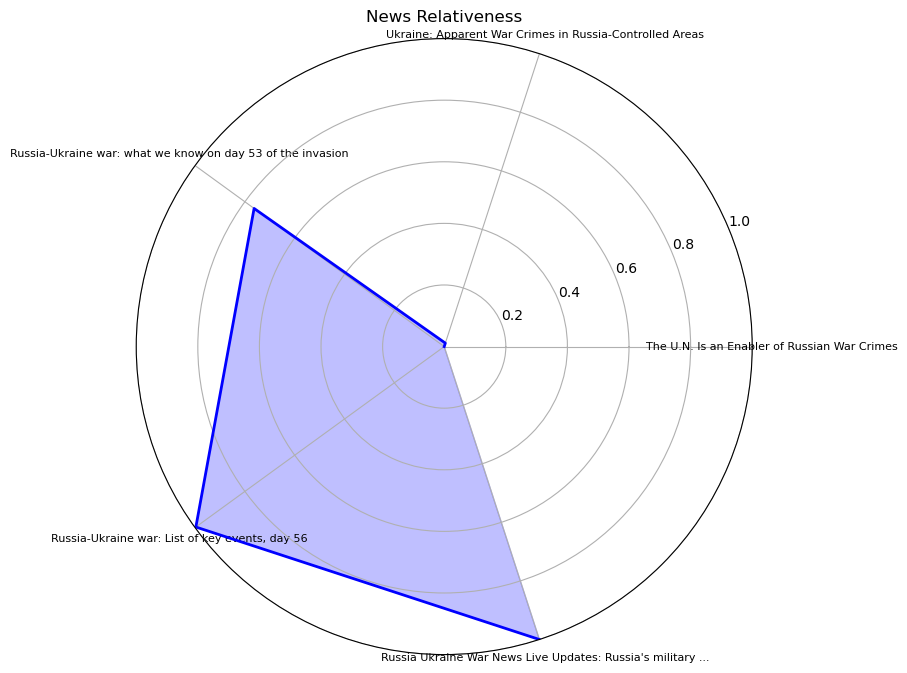

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Normalize distances to a range of [0, 1]
normalized_distances = (recommendations['distance'] - recommendations['distance'].min()) / (
        recommendations['distance'].max() - recommendations['distance'].min())

# Create a polar plot
angles = np.linspace(0, 2 * np.pi, len(normalized_distances), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, normalized_distances, color='blue', alpha=0.25)
ax.plot(angles, normalized_distances, color='blue', linewidth=2)
ax.set_ylim(0, 1)

# Set the labels for each headline at respective angles
ax.set_xticks(angles)
ax.set_xticklabels(recommendations['Headlines'], fontsize=8)
plt.title('News Relativeness')
plt.show()
